In [1]:
library(ggplot2) # powerful visualization library
library(dplyr) # powerful data wrangling library


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [2]:
## Sales data (user-given)
t = seq(1, 20)
s = c(2.8, 2.1, 4, 4.5, 3.8, 3.2, 4.8, 5.4, 4, 3.6, 5.5, 5.8, 4.3, 3.9, 6, 6.4, NA, NA, NA, NA)
salesData <- data.frame(t, s)
colnames(salesData) = c('time', 'sales')
salesData

time,sales
<int>,<dbl>
1,2.8
2,2.1
3,4.0
4,4.5
5,3.8
6,3.2
7,4.8
8,5.4
9,4.0


Warning message:
"Removed 4 row(s) containing missing values (geom_path)."
Warning message:
"Removed 4 rows containing missing values (geom_point)."


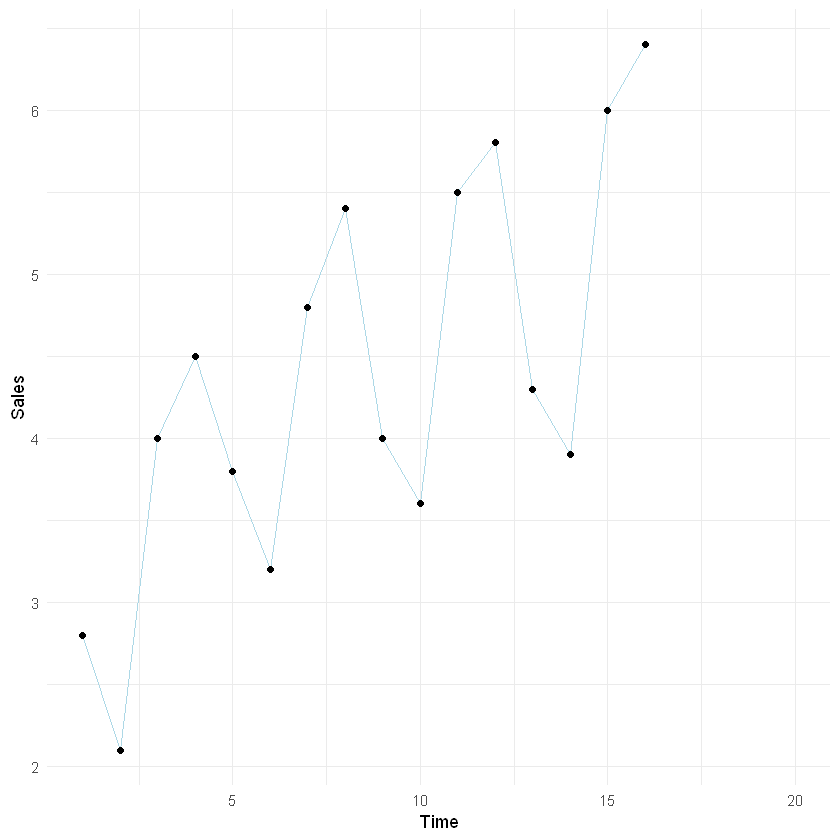

In [3]:
## Plot the sales data
p1 = ggplot(salesData, aes(x = time, y = sales)) +
  geom_line(col = 'light blue' ) +
  geom_point() +
  xlab('Time') +
  ylab('Sales') +
  theme_minimal()
p1 

`geom_smooth()` using formula 'y ~ x'

Warning message:
"Removed 4 rows containing non-finite values (stat_smooth)."
Warning message:
"Removed 4 rows containing missing values (geom_point)."


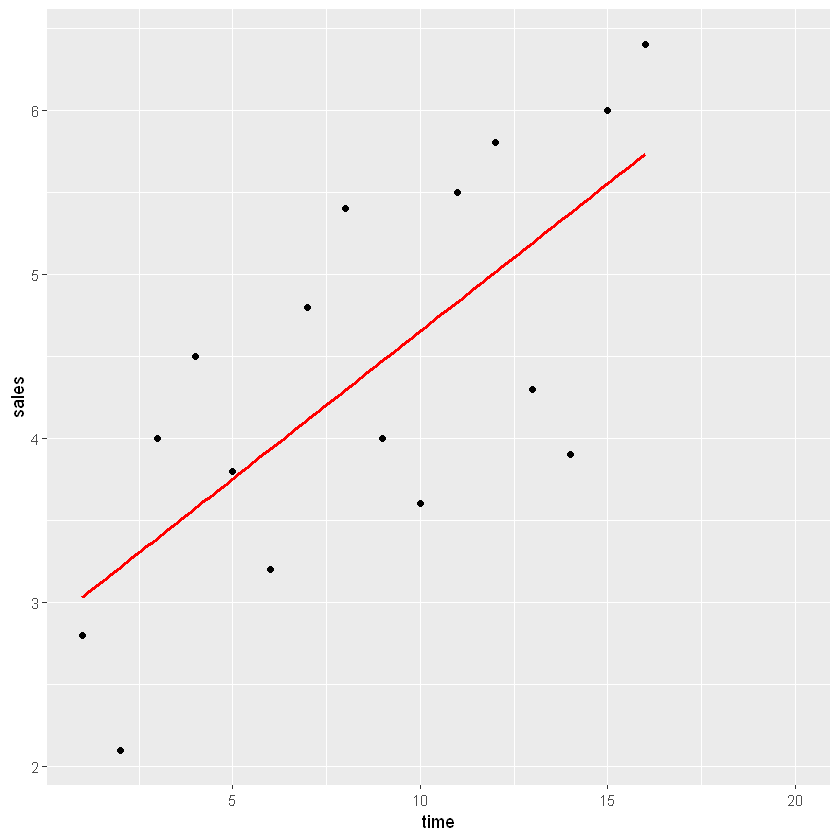

In [4]:
## Fit a linear regression model to the sales data
p2 = ggplot(salesData, aes(x = time, y = sales), col = 'light blue' ) +
  geom_point() +
  stat_smooth(method= 'lm' ,col= 'red', se = FALSE)
p2 

In [5]:
## Calculate a moving average of the data
k = 4 # size of the subset for which average is calculated

s = salesData$sales # sales values
mavg = rep(NA, length(s)) # empty array to store moving averages
index = k-1

for (i in c(1:length(s))){
  if (i <= length(s)-k+ 1 ){
    #mavg[3] = mean(s[1:4])
    mavg[index] = mean(s[seq(i, i+(k-1))])
    index = index + 1
  }
}

mavg

[1]    NA    NA 3.350 3.600 3.875 4.075 4.300 4.350 4.450 4.625 4.725 4.800
[13] 4.875 5.000 5.150    NA    NA    NA    NA    NA

In [6]:
print(mean(s[seq(15, 15+(k-1))]))

[1] NA


Warning message:
"Removed 4 row(s) containing missing values (geom_path)."
Warning message:
"Removed 4 rows containing missing values (geom_point)."
Warning message:
"Removed 7 row(s) containing missing values (geom_path)."
Warning message:
"Removed 7 rows containing missing values (geom_point)."


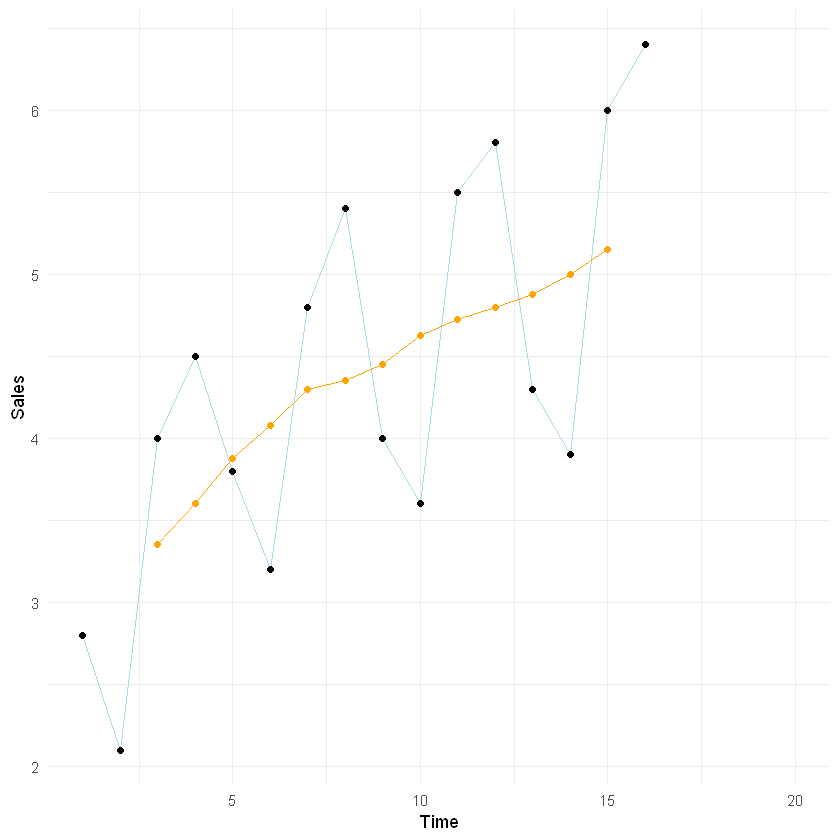

In [7]:
## Superimpose plot of moving averages over original time series
mSalesData = data.frame(salesData, mavg = mavg)
p3 = ggplot(mSalesData, aes(x = time, y = sales))+
  geom_line(col = 'light blue')+
  geom_point()+
  geom_line(aes(x = time, y = mavg), col = 'orange')+
  geom_point(aes(x = time, y = mavg), col = 'orange')+
  xlab('Time')+
  ylab('Sales')+
  theme_minimal()
p3  

In [8]:
## Calculate seasonality-plus-irregular component of the data
k = 4 # size of the subset for which average is calculated

s = salesData$sales # sales values
si = rep(NA, length(s)) # empty array to store seasonality-plus-irregular component 
index = k-1

for (i in c(1:length(s))){
  if (i <= length(s)-k+ 1 ){
    si[index] = s[index] / mean(s[seq(i, i+(k-1))]) # Seasonality + Irregular Component
    index = index + 1
  }
}

si

[1]        NA        NA 1.1940299 1.2500000 0.9806452 0.7852761 1.1162791
 [8] 1.2413793 0.8988764 0.7783784 1.1640212 1.2083333 0.8820513 0.7800000
[15] 1.1650485        NA        NA        NA        NA        NA

Warning message:
"Removed 4 row(s) containing missing values (geom_path)."
Warning message:
"Removed 4 rows containing missing values (geom_point)."
Warning message:
"Removed 7 row(s) containing missing values (geom_path)."
Warning message:
"Removed 7 rows containing missing values (geom_point)."


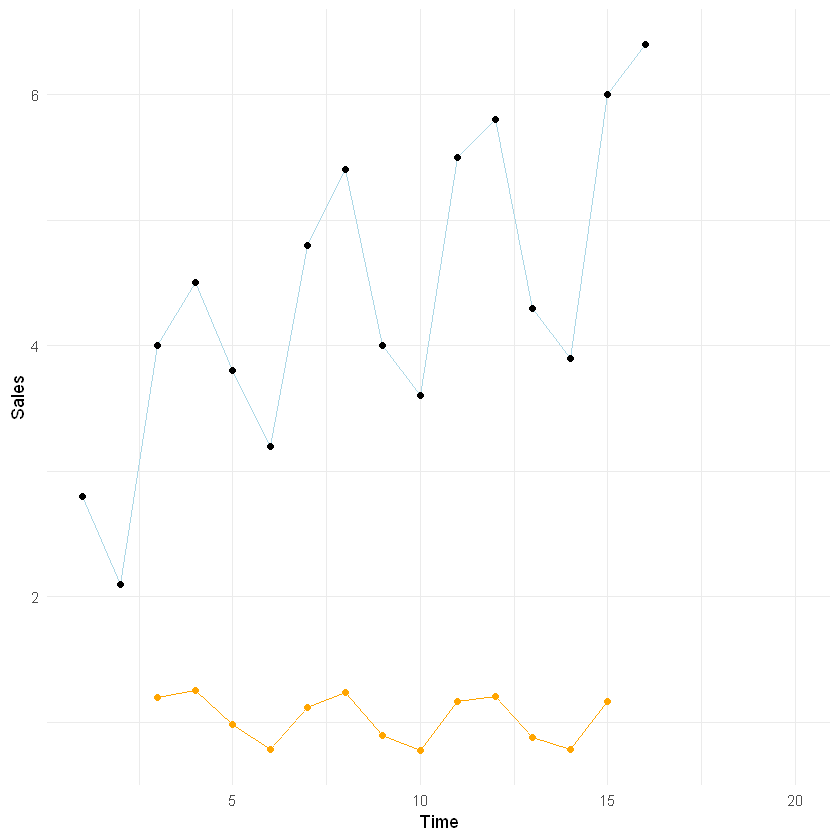

In [9]:
## Superimpose plot of sesonality over original time series
smSalesData = data.frame(mSalesData, si = si)
p4 = ggplot(smSalesData, aes(x = time, y = sales))+
  geom_line(col = 'light blue')+
  geom_point()+
  geom_line(aes(x = time, y = si), col = 'orange')+
  geom_point(aes(x = time, y = si), col = 'orange')+
  xlab('Time')+
  ylab('Sales')+
  theme_minimal()
p4 

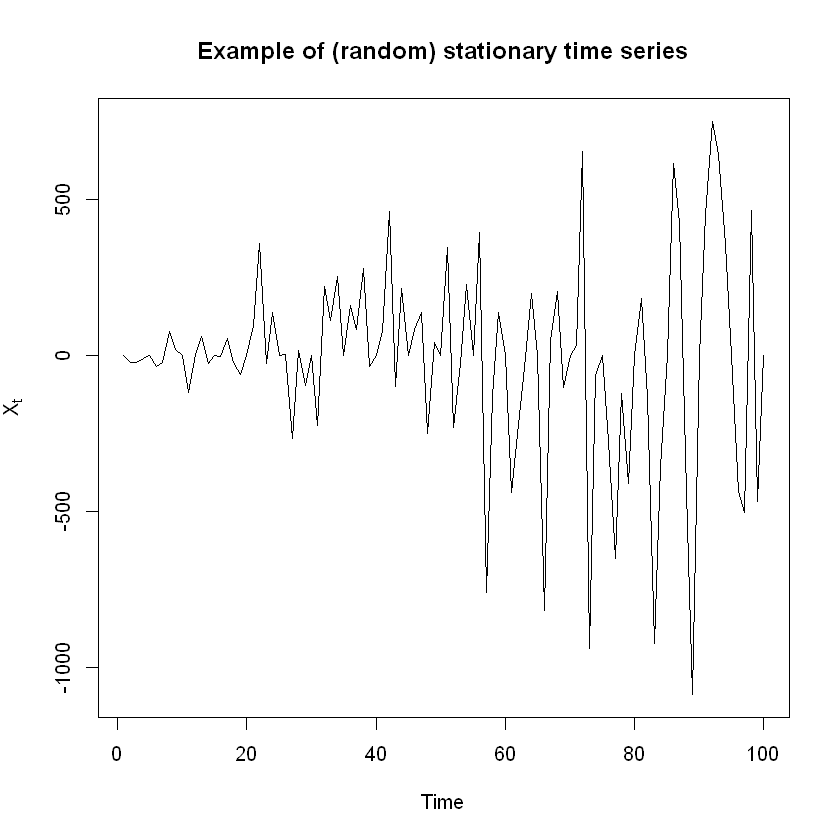

In [18]:
eps = rnorm(100, mean = 0, sd = 1) # random noise
mu = 2 # the constant mean of the time series
# The process, that is the time series
#Y_t = mu + eps
#Y_t = 1.5*(1:length(eps)) + eps
#Y_t = 5.5*sin((2*pi/10)*(1:length(eps))) + eps

#Additive time series
#Y_t = 1.5*(1:length(eps)) + 5.5*sin((2*pi/10)*(1:length(eps))) + eps

#Muliplicative time series
Y_t = 1.5*(1:length(eps)) * 5.5*sin((2*pi/10)*(1:length(eps))) * eps

# plotting the time series
ts.plot(Y_t, main = "Example of (random) stationary time series", ylab = expression(X[t]))

In [19]:
# Load the car sales dataset
file = 'carsales.csv'
csData = read.csv(file, header = TRUE, stringsAsFactors = FALSE)
colnames(csData) = c('Date', 'Sales')
head(csData)

,Date,Sales
,<chr>,<int>
1,1992-01-01,1744
2,1992-02-01,1990
3,1992-03-01,2177
4,1992-04-01,2601
5,1992-05-01,2171
6,1992-06-01,2207


In [20]:
csData.ts = ts(data = csData$Sales, frequency = 12, start =c(1992, 1), end = c(2021, 10)) 

In [24]:
class(csData.ts)

[1] "ts"

In [25]:
csData.ts

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1992,1744,1990,2177,2601,2171,2207,2251,2087,2016,2149,1667,1583
1993,2022,2199,2526,2564,2309,2393,2485,2287,2167,2339,2253,2060
1994,2199,2432,2669,2782,2638,2769,2774,3119,2887,3136,2564,2470
1995,2709,2833,3296,2998,3180,3303,3492,3445,3223,3074,2931,2558
1996,2871,3451,4046,3879,3727,3538,3571,3511,3221,3526,3262,3006
1997,3377,3834,4089,4115,4022,4088,4066,3864,3741,3822,3294,3374
1998,3681,4154,4523,4400,4356,4723,4535,4476,4138,4535,3730,3691
1999,4115,4597,4921,4824,4950,5047,4895,4892,4509,4516,4292,4095
2000,4381,5327,5434,4841,4986,5161,4989,5089,4860,4574,4089,3928
2001,4648,4917,5359,4991,5390,5169,4906,5142,4291,4903,4444,4103


In [21]:
start(csData.ts)

[1] 1992    1

In [22]:
end(csData.ts)

[1] 2021   10

In [23]:
time(csData.ts)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1992,1992.000,1992.083,1992.167,1992.250,1992.333,1992.417,1992.500,1992.583,1992.667,1992.750,1992.833,1992.917
1993,1993.000,1993.083,1993.167,1993.250,1993.333,1993.417,1993.500,1993.583,1993.667,1993.750,1993.833,1993.917
1994,1994.000,1994.083,1994.167,1994.250,1994.333,1994.417,1994.500,1994.583,1994.667,1994.750,1994.833,1994.917
1995,1995.000,1995.083,1995.167,1995.250,1995.333,1995.417,1995.500,1995.583,1995.667,1995.750,1995.833,1995.917
1996,1996.000,1996.083,1996.167,1996.250,1996.333,1996.417,1996.500,1996.583,1996.667,1996.750,1996.833,1996.917
1997,1997.000,1997.083,1997.167,1997.250,1997.333,1997.417,1997.500,1997.583,1997.667,1997.750,1997.833,1997.917
1998,1998.000,1998.083,1998.167,1998.250,1998.333,1998.417,1998.500,1998.583,1998.667,1998.750,1998.833,1998.917
1999,1999.000,1999.083,1999.167,1999.250,1999.333,1999.417,1999.500,1999.583,1999.667,1999.750,1999.833,1999.917
2000,2000.000,2000.083,2000.167,2000.250,2000.333,2000.417,2000.500,2000.583,2000.667,2000.750,2000.833,2000.917
2001,2001.000,2001.083,2001.167,2001.250,2001.333,2001.417,2001.500,2001.583,2001.667,2001.750,2001.833,2001.917


In [26]:
frequency(csData.ts)

[1] 12

In [27]:
deltat(csData.ts)

[1] 0.08333333

In [28]:
csData.ts[1:5]

[1] 1744 1990 2177 2601 2171

In [33]:
tmp = window(csData.ts, start=c(1993, 3), end=c(1994, 8))
class(tmp) 
tmp


[1] "ts"

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1993,,,2526,2564,2309,2393,2485,2287,2167,2339,2253,2060
1994,2199,2432,2669,2782,2638,2769,2774,3119,,,,


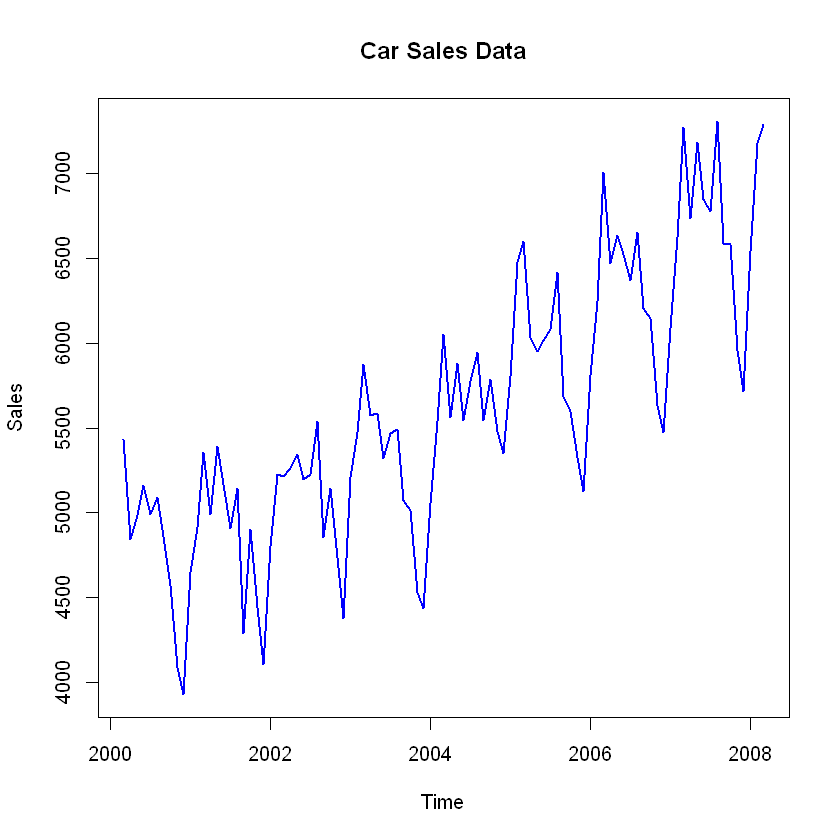

In [34]:
plot(window(csData.ts, start = c(2000, 3), end = c(2008, 3)),
ylab = "Sales",  col = "blue", lwd = 2, main = "Car Sales Data") 

In [ ]:
length(csData$Sales)

In [ ]:
## Calculate a moving average of the data
k = 12 # size of the subset for which average is calculated

csData['Salesmavg'] = 0

for (i in seq(7, length(csData$Sales)-6)){
  csData[i, 'Salesmavg'] = csData[i-6,'Sales']
}
  

In [ ]:
plot(decompose(csData.ts))